# Exercise 3 - Problem 1 

Let's setup our env by importing the required libraries

In [1]:
# import go here
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Extract the following Numeric variables from the datasea,
# and store as a new Pandas Dataframe

houseData = pd.read_csv('./train.csv')
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

## (a) Check and visualise our variables 
Let's check the individual statistical description, then visualise the statistical distribution of each of the variiables

In [5]:
houseNumData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LotArea      1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   GarageArea   1460 non-null   int64
 4   SalePrice    1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


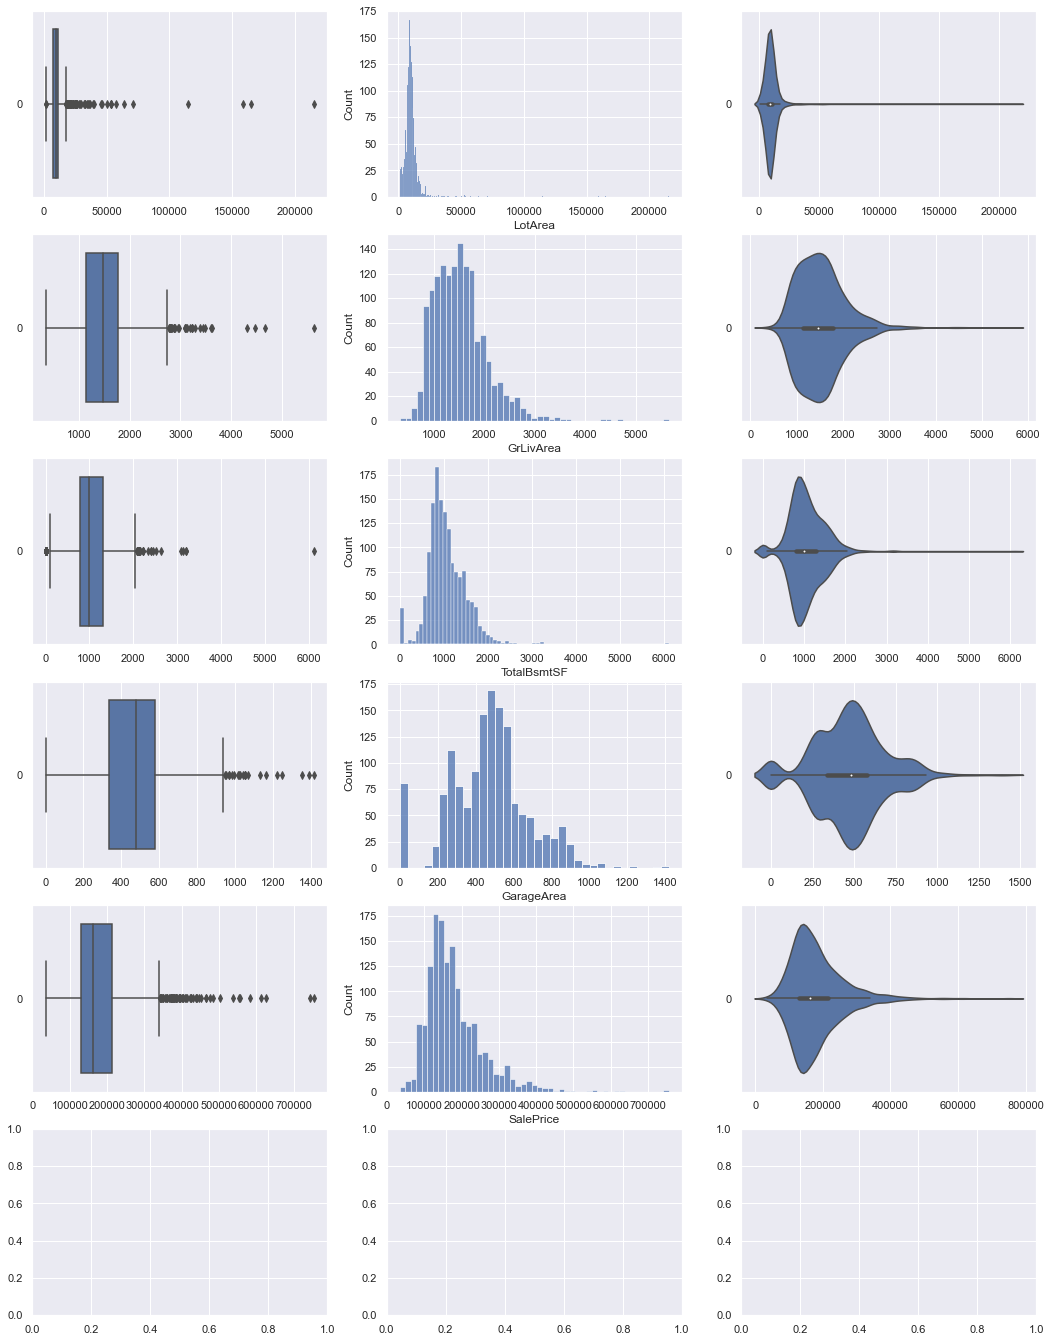

In [8]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1

## (b) Do we have a normal dist?
Let's comment on whether the distribution looks like a normal dist or different. 

In [9]:
# Remember to use the .skew() method to find how skewed each of the distributions is

houseNumData.skew()


LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

Comment on (b): Seems like LotArea is the most skewed.

## (c) Relationships between variables 
Let's check the relationship amongst the variables using the mutual correlation and correlation heatmap. 

Comment which variable has the strongest correlation with SalePrice. Is this useful in predicting SalePrice?

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

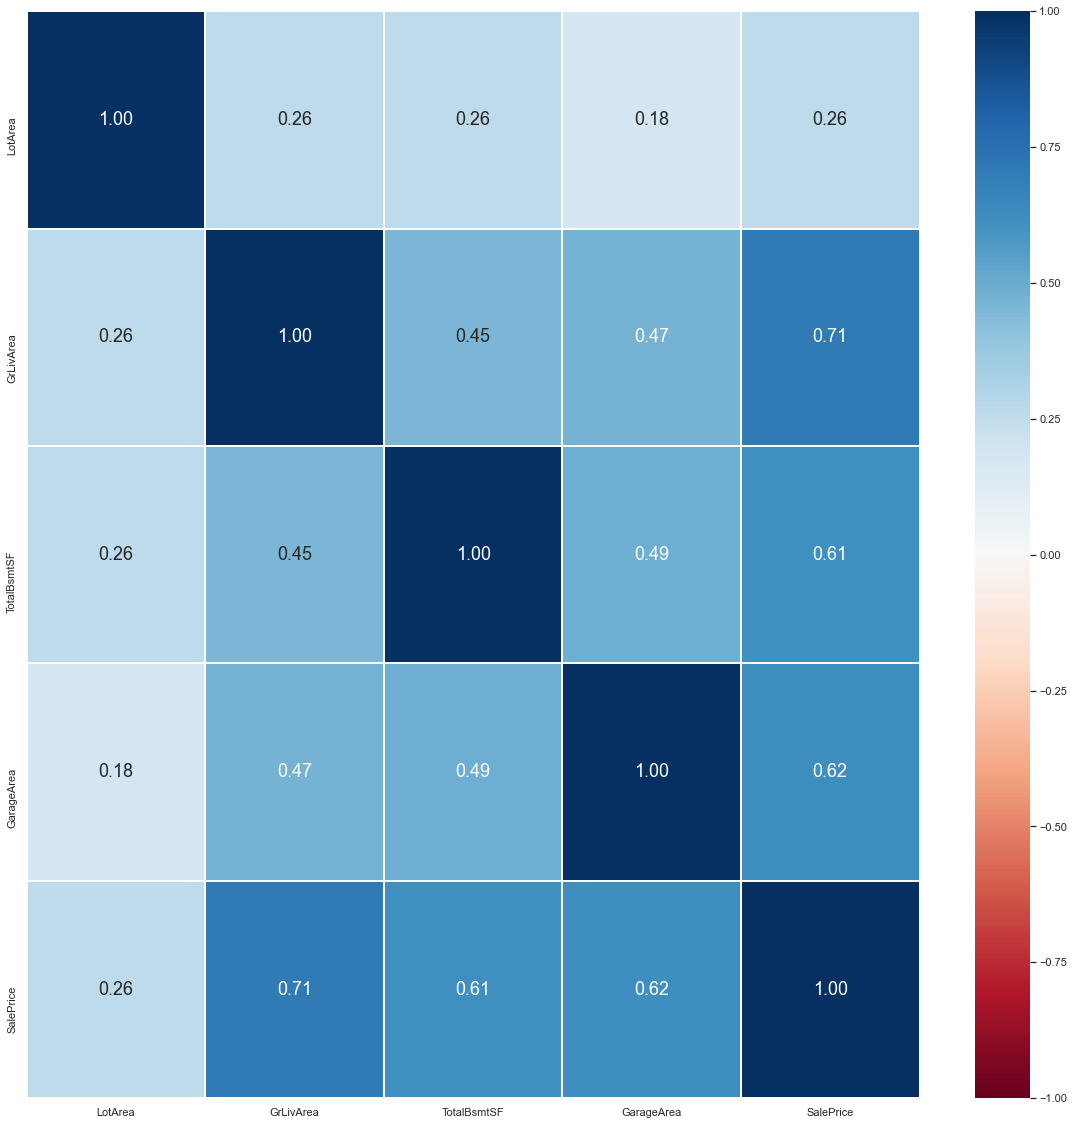

In [10]:
# Correlation Matrix
print(houseNumData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Comment on (c): Seems like GrLiveArea correlates the most with SalePrice

## (d) Relationship with SalePrice 
Check the relationship between the vars using mutual joinplots and an overall pairplot.
Comment which of the vars has the strongest linear relation with SalePrice. Is this useful in predicting SalePrice?

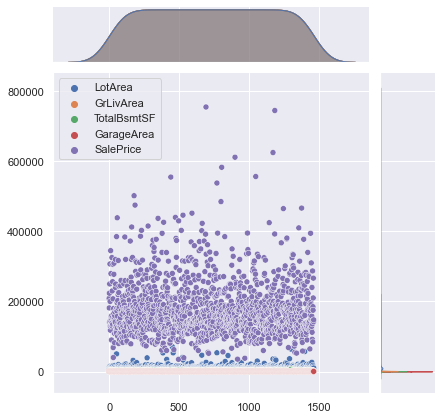

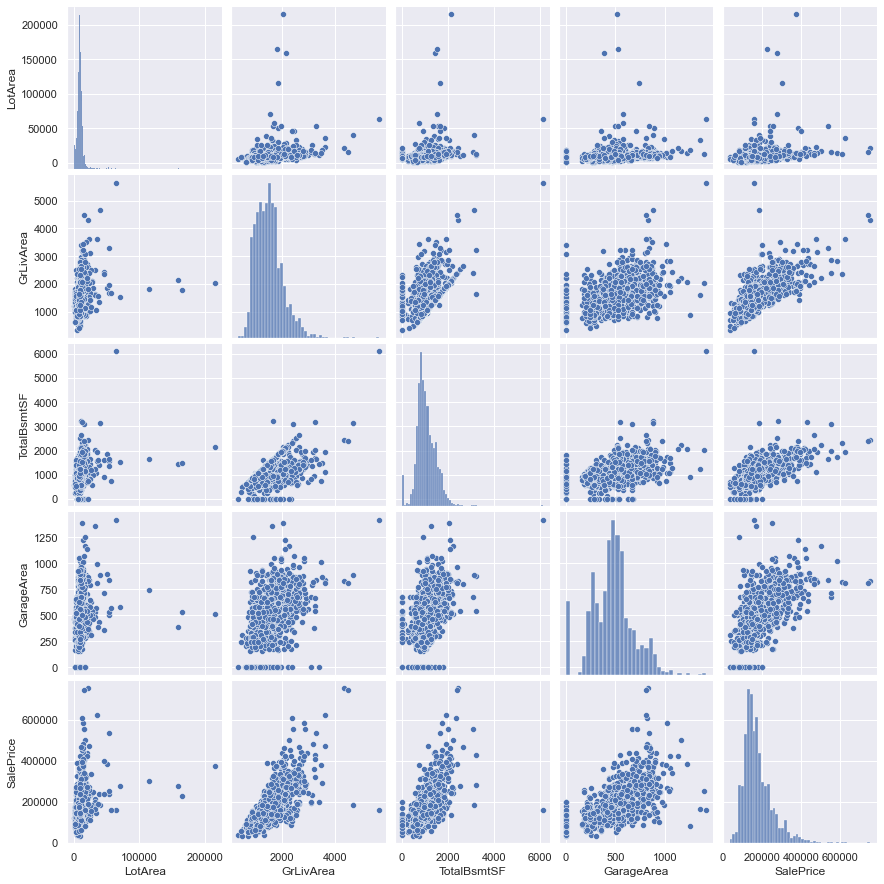

In [13]:
# Mutual joinplot
sb.jointplot(data = houseNumData)

# Draw pairs of variables against one another
sb.pairplot(data = houseNumData)



Comment on (d): Yes, I'd suppose it is helpful in predicting SalePrice...

# Exercise 3 - Problem 2

In [14]:
# extract the data from the dataset
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

## (a) 
Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).

In [17]:
# let's examine the data:

houseCatData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [18]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [19]:
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [20]:
houseCatData[:10] 

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8
5,50,Mitchel,1Fam,5
6,20,Somerst,1Fam,8
7,60,NWAmes,1Fam,7
8,50,OldTown,1Fam,7
9,190,BrkSide,2fmCon,5


In [24]:
# astype the vars

for col in houseCatData:
    houseCatData[col] = houseCatData[col].astype('category')
    
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 8.0 KB


## (b)
Check the individual statistical description and visualize the distributions (catplot) of each of these variables.

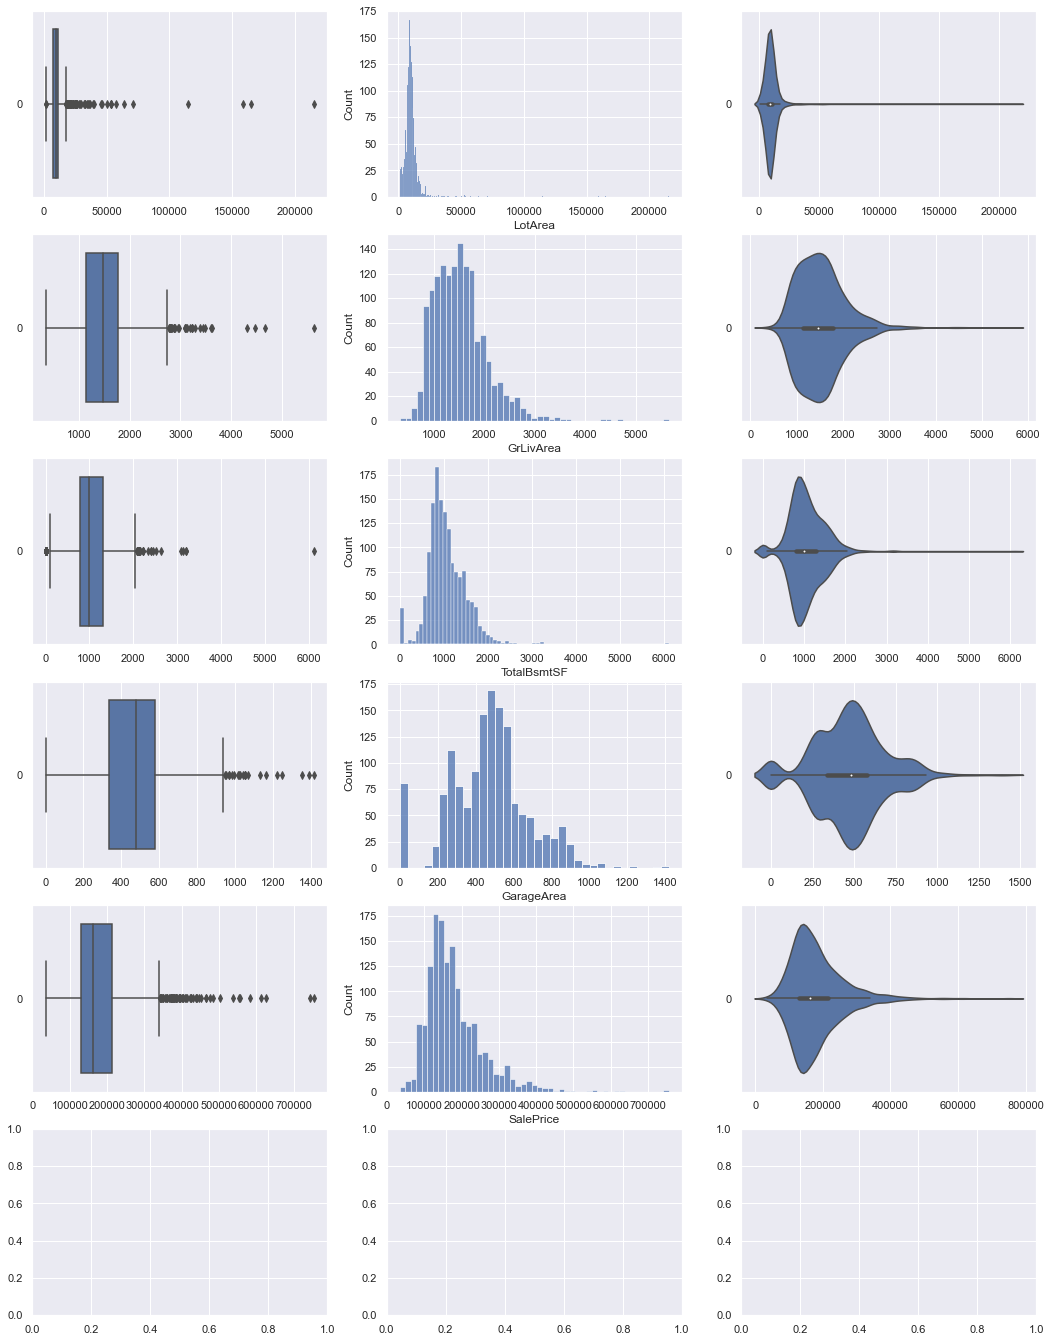

In [25]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1
    

## (c) 
One may check the relation amongst two categorical variables through the bi-variate joint heatmap of counts.
Use groupby() command to generate joint heatmap of counts for “OverallQual” against the other three variables.
Comment if this is useful in identifying the relation between “OverallQual” with the other variables.

## (d)
Draw boxplots of “SalePrice” against each of these categorical variables. Notice the patterns in these boxplots.
Comment on which of these variables has the most influence in predicting “SalePrice”.